# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#create query url
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

#create lists
lng = []
lat = []
temp = []
cloudiness = []
humidity = []
wind_speed = []
city_id = []
city_name = []
country = []
date = []
max_temp = []

#loop through cities
for city in cities:
    
    #create json response
    response = requests.get(query_url + city).json()
    
    
    #try/except
    try:
    
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        
        print(f"City Name: {city}")
        
    except:
        
        print("city does not exist")


City Name: batagay-alyta
City Name: debre tabor
City Name: east london
City Name: victoria
City Name: rikitea
City Name: bluff
City Name: circleville
City Name: vaini
City Name: tasiilaq
City Name: barrow
City Name: mataura
City Name: bethel
City Name: kahului
City Name: hermanus
City Name: grindavik
City Name: khatanga
City Name: beirut
city does not exist
City Name: tromso
city does not exist
City Name: busselton
City Name: atuona
City Name: qaanaaq
City Name: brooks
City Name: mattawa
city does not exist
City Name: longyearbyen
City Name: tiksi
City Name: richards bay
City Name: constitucion
City Name: cidreira
City Name: talaya
City Name: chuy
City Name: lebu
City Name: portland
City Name: arraial do cabo
City Name: novobirilyussy
City Name: cherskiy
City Name: upernavik
City Name: bredasdorp
City Name: hamilton
City Name: puerto ayora
City Name: talara
City Name: palmer
city does not exist
City Name: castro
City Name: chokurdakh
City Name: muzhi
City Name: ribeira grande
City Name

City Name: svetlyy
City Name: esperance
City Name: el alto
City Name: komsomolskiy
City Name: tommot
City Name: jince
City Name: gushikawa
City Name: omsukchan
City Name: inirida
City Name: sao jose da coroa grande
City Name: soyo
City Name: tessalit
City Name: kavaratti
City Name: tazlau
City Name: padang
City Name: axim
City Name: port augusta
City Name: chandla
City Name: paciran
City Name: tilichiki
City Name: tarsus
City Name: kapoeta
City Name: mahibadhoo
City Name: nyurba
City Name: sao geraldo do araguaia
City Name: talcahuano
City Name: jieshi
City Name: avera
City Name: mumford
city does not exist
City Name: berlevag
City Name: kandrian
City Name: biloli
City Name: ombessa
City Name: banmankhi
city does not exist
City Name: caala
City Name: bayburt
City Name: west odessa
City Name: olafsvik
City Name: ucluelet
City Name: navrongo
City Name: limbang
City Name: severobaykalsk
City Name: alice town
City Name: pontes e lacerda
City Name: dingle
city does not exist
City Name: okho

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weatherpy_dict = {"City ID": city_id,
                  "City Name": city_name,
                  "Longitude":lng,
                  "Latitude":lat,
                  "Cloudiness":cloudiness,
                  "Temp":temp,
                  "Humidity":humidity,
                  "Wind Speed":wind_speed,
                  "Country":country,
                  "Date":date,
                  "Max Temp":max_temp
}


weatherpy_df = pd.DataFrame(weatherpy_dict)
weatherpy_df.head()

,City ID,City Name,Longitude,Latitude,Cloudiness,Temp,Humidity,Wind Speed,Country,Date,Max Temp
0,2027042,Batagay-Alyta,130.4114,67.8006,100,47.12,86,4.23,RU,1659476926,47.12
1,339686,Debre Tabor,38.0167,11.8500,100,50.32,96,3.06,ET,1659476927,50.32
2,1006984,East London,27.9116,-33.0153,79,65.57,61,6.46,ZA,1659476927,65.57
3,1819729,Hong Kong,114.1577,22.2855,100,83.05,82,1.01,HK,1659476861,84.38
4,4030556,Rikitea,-134.9692,-23.1203,73,72.36,76,21.00,PF,1659476928,72.36


In [5]:
# Export to .csv file
weatherpy_df.to_csv("weatherpy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
max_humidity = weatherpy_df["Humidity"].max()
print(max_humidity)

100


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

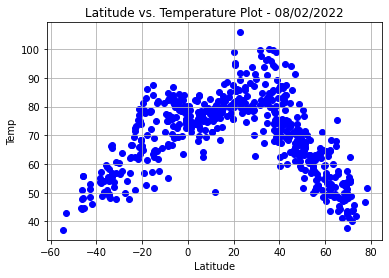

In [9]:
#create scatterplot
plt.scatter(weatherpy_df["Latitude"],weatherpy_df["Temp"], facecolor = "blue")
plt.title("Latitude vs. Temperature Plot - 08/02/2022")
plt.xlabel("Latitude")
plt.ylabel("Temp")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

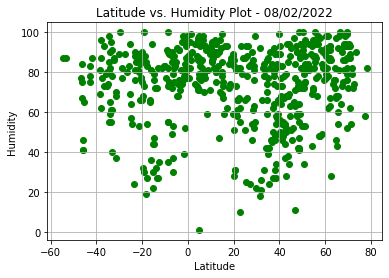

In [10]:
#create scatterplot
plt.scatter(weatherpy_df["Latitude"],weatherpy_df["Humidity"], facecolor = "green")
plt.title("Latitude vs. Humidity Plot - 08/02/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

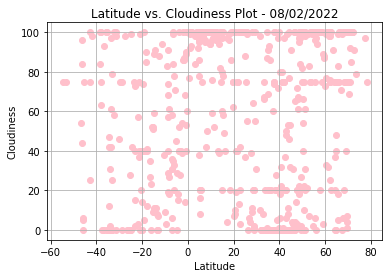

In [11]:
#create scatterplot
plt.scatter(weatherpy_df["Latitude"],weatherpy_df["Cloudiness"], facecolor = "pink")
plt.title("Latitude vs. Cloudiness Plot - 08/02/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

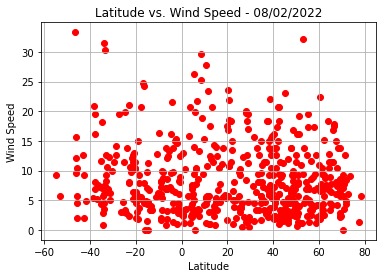

In [12]:
#create scatterplot
plt.scatter(weatherpy_df["Latitude"],weatherpy_df["Wind Speed"], facecolor = "red")
plt.title("Latitude vs. Wind Speed - 08/02/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.show()

## Linear Regression

In [22]:
northern_hemisphere = weatherpy_df.loc[weatherpy_df["Latitude"]>0]
southern_hemisphere = weatherpy_df.loc[weatherpy_df["Latitude"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: -0.6530520200332418


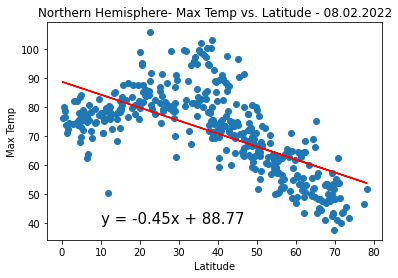

In [23]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & lables
plt.annotate(line_eq,(10,40), fontsize = 15, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere- Max Temp vs. Latitude - 08.02.2022')
print(f"The rvalue is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.8001973551841334


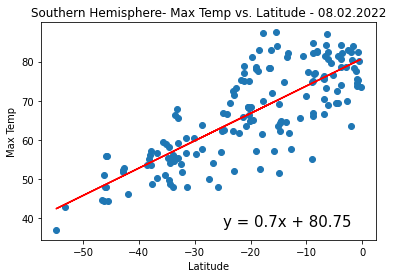

In [24]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & lables
plt.annotate(line_eq,(-25,38), fontsize = 15, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere- Max Temp vs. Latitude - 08.02.2022')
print(f"The rvalue is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: -0.008153633842738907


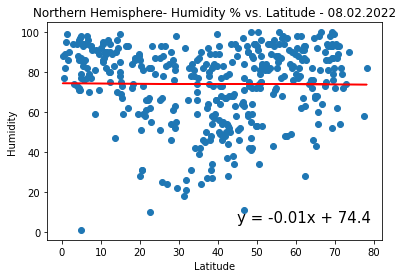

In [25]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & lables
plt.annotate(line_eq,(45,5), fontsize = 15, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere- Humidity % vs. Latitude - 08.02.2022')
print(f"The rvalue is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: -0.001264149047238298


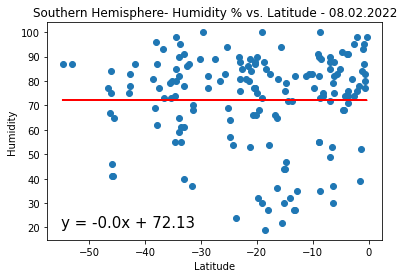

In [26]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & lables
plt.annotate(line_eq,(-55,20), fontsize = 15, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere- Humidity % vs. Latitude - 08.02.2022')
print(f"The rvalue is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: -0.08369045257337865


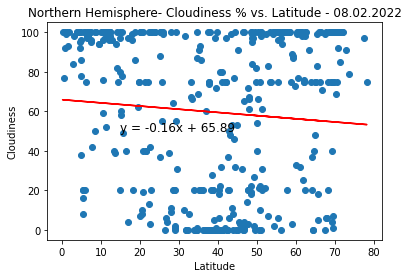

In [27]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & lables
plt.annotate(line_eq,(15,50), fontsize = 12, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere- Cloudiness % vs. Latitude - 08.02.2022')
print(f"The rvalue is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.0026664307439034636


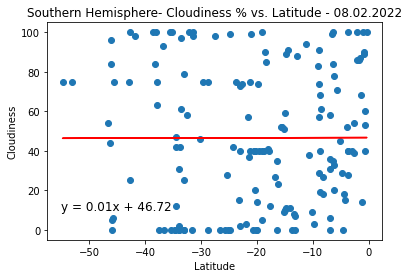

In [28]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & lables
plt.annotate(line_eq,(-55,10), fontsize = 12, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere- Cloudiness % vs. Latitude - 08.02.2022')
print(f"The rvalue is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: -0.06922800034103188


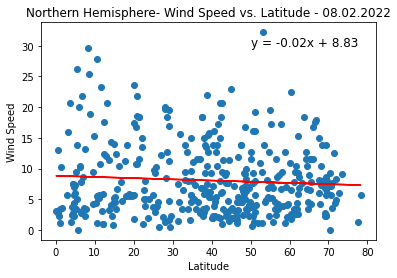

In [29]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & lables
plt.annotate(line_eq,(50,30), fontsize = 12, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere- Wind Speed vs. Latitude - 08.02.2022')
print(f"The rvalue is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: -0.16578839613710358


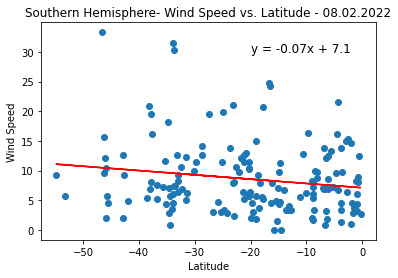

In [31]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & lables
plt.annotate(line_eq,(-20,30), fontsize = 12, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere- Wind Speed vs. Latitude - 08.02.2022')
print(f"The rvalue is: {rvalue}")

In [ ]:
* 3 Trends

* There is a strong correlation within the Northern Hemisphere that indicates the higher the latitude the lower the temperature.  We see a similiar correlation within the Southern Hemisphere, where the lower the latitude the lower the temperature.

* Within the Southern Hemisphere there is no correlation between cloudiness and latitude indicating that cloudiness is not impacted by latitude.

* The Southern Hemisphere has a stronger correlation with wind speed and latitude vs. the Northern Hemisphere.  In the Southern Hemisphere, the lower the latitude, the wind speeds tend to be slightly higher, due to outliers in the data.